<a href="https://colab.research.google.com/github/wjddhkszb/opentutorials_git_wjddhkszb/blob/master/%ED%8A%B9%ED%97%88_%EB%B6%84%EB%A5%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BERT INPUT 층**

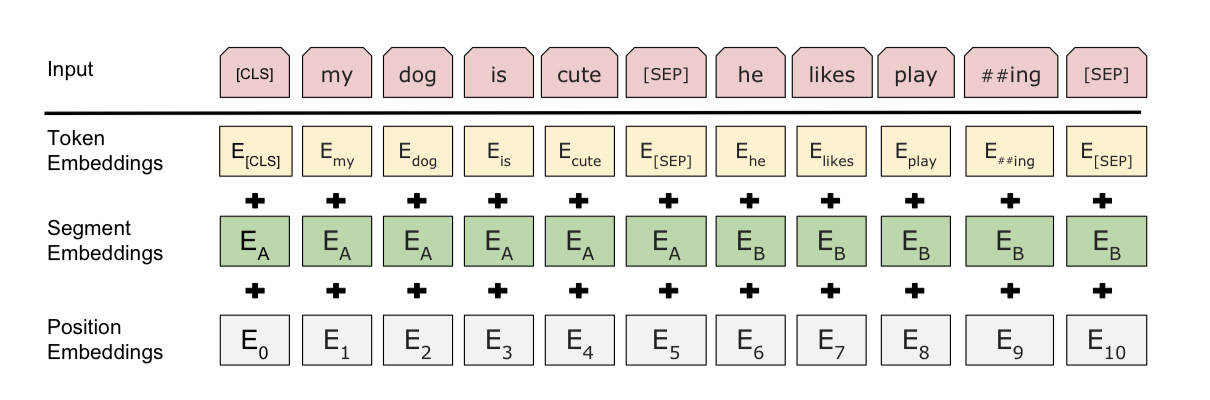

# **BERT를 이용하기 위한 셋팅**

### **필요한 라이브러리 다운로드**

In [ ]:
!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install transformers
!pip install sklearn

### **라이브러리 임포트 시키기**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import transformers
import json
from tqdm import tqdm
import os
import re

### **구글 드라이브 연동**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# **특허 데이터 셋팅**

### **판다스를 이용한 특허 데이터 가져오기**

In [ ]:
train_df = pd.read_csv('/content/gdrive/My Drive/특허 데이터/kipris_classification_train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/특허 데이터/kipris_classification_test.csv')

In [ ]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(train_df, test_size=0.2)

In [ ]:
train_df.head(5)

,inventiontitle,astrtcont,classification
21352,면역기능 향상을 위한 밀기울의 가공방법,본 발명은 아라비노자일란(Arabinoxylan) 및 식이섬유가 많이 함유된 밀기울...,2
26229,딸기 수확 후 선도유지를 위한 이산화탄소 처리 방법,"본 발명은 딸기 수확 후 선도유지를 위한 이산화탄소 처리 방법에 관한 것으로, CO...",2
3715,만성 대뇌 저관류 동물 모델의 신규한 용도,본 발명은 만성 대뇌 저관류 동물 모델의 우울증 동물 모델로서의 용도에 관한 것으로...,0
11234,패턴화된 금속산화물 나노입자 구조체의 제조방법 및 이에 의해 제조된 패턴화된 금속산...,"본 발명은 금속산화물 나노입자 구조체에 관한 것으로서, 기판 상에 금속레지스트를 코...",9
24063,피부 개선용 조성물,본 발명은 피부 개선용 조성물에 관한 것이다. 본 발명에 따른 아스테로사포닌 P ...,2


In [ ]:
valid_df.head(5)

,inventiontitle,astrtcont,classification
6124,"반도체 장치 및 그 제조 방법, 및 가요성 수지층 형성용 수지 조성물",회로 부품을 봉지하는 가요성 수지층을 갖는 회로 기판을 구비하는 반도체 장치를 제조...,9
4397,"연소 가스 검출기를 갖는 에어로졸 발생 장치, 시스템 및 방법",에어로졸 형성 기재(12)를 가열하도록 구성되어 있는 에어로졸 발생 장치(100)로...,4
26191,무설탕 백복령 감초 식혜의 제조방법 및 이에 의해 제조된 무설탕 백복령 감초 식혜,"본 발명은 무설탕 백복령 감초 식혜의 제조방법 관한 것으로, 보다 구체적으로 본 발...",2
14136,차량용 램프,"본 발명의 실시예는 렌즈부의 결로를 제거하는 차량 램프 구조에 대한 것으로, 렌즈부...",9
24329,거치대 분리형 와플제조기,"본 발명은 와플제조기에 관한 것으로, 상부틀과 하부틀이 힌지 결합되어 개폐 가능하게...",2


In [ ]:
test_df.head(5)

,inventiontitle,astrtcont,classification
0,교정신발 밑창용 충전재,본 발명은 교정신발의 밑창 내부에 구비되는 충전재의 내부에 경질의 지지부재가 구비되...,7
1,접지력이 향상된 하이브리드 골프화,"본 발명은 지면과의 슬립을 막아 안정적인 접지력을 제공하는 골프화에 관한 것으로, ...",7
2,미끄럼 방지 구조를 구비하는 아쿠아슈즈,"본 발명은, 착용감이 우수하고 특히 수분이 많은 장소에서의 사용상 쾌적함과 안전성이...",7
3,이동단말기용 커버장치,"본 발명의 이동단말기용 커버장치는, 이동단말기를 감싸도록 형성되고, 후측 내부에 상...",7
4,"신발창, 신발의 안창, 신발의 본창 및 신발","본 발명은, 특정 시트 형상의 적층체에 의해서 형성된 신규한 신발창, 신발의 안창,...",7


In [ ]:
train_df['astrtcont'] = train_df['astrtcont'].str.replace(r'[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\\n\t]+', " ", regex=True)
train_df['astrtcont'] = train_df['astrtcont'].str.replace(r'\t+', " ", regex=True)
train_df['astrtcont'] = train_df['astrtcont'].str.replace(r'[\\n]+'," ", regex=True)
valid_df['astrtcont'] = valid_df['astrtcont'].str.replace(r'[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\\n\t]+', " ", regex=True)
valid_df['astrtcont'] = valid_df['astrtcont'].str.replace(r'\t+', " ", regex=True)
valid_df['astrtcont'] = valid_df['astrtcont'].str.replace(r'[\\n]+'," ", regex=True)
test_df['astrtcont'] = test_df['astrtcont'].str.replace(r'[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', " ", regex=True)
test_df['astrtcont'] = test_df['astrtcont'].str.replace(r'\t+', " ", regex=True)
test_df['astrtcont'] = test_df['astrtcont'].str.replace(r'[\\n]+'," ", regex=True)

In [ ]:
train_df.head(5)

,inventiontitle,astrtcont,classification
4314,제단용 화환대,본 발명은 다수의 단위조립체들의 결합을 통해 제단을 장식하는 화환대를 구성하도록 ...,0
11254,열전 모듈 및 그 제조방법,단위면적당 보다 많은 열전소자를 집적하여 출력밀도 power de sity 가 증가...,9
27973,편평-절첩식 호흡기,개인용 호흡 보호 장치 10 는 상부 패널 18 중앙 패널 16 및 하부 패널 ...,6
22674,엘이디 시트,본 발명은 엘이디 시트에 관한 것으로서 보다 상세하게는 일면에 회로패턴이 형성된 ...,2
3383,유인 기능이 향상된 두족류 포획용 낚시 어구,본 발명은 유인 기능이 향상된 두족류 포획용 낚시 어구를 제공하는 것을 목적으로 하...,0


In [ ]:
valid_df.head(5)

,inventiontitle,astrtcont,classification
24300,안구건조증 및 골다공증에 효과가 있는 석결명 식초 및 이의 제조방법,본 발명은 전복껍질을 발효식초에 용해 숙성시켜 액화함으로써 음용이 쉽고 부작용이 거...,2
12920,나노 결정 발광 다이오드 및 그 제조 방법,나노 결정 발광 다이오드 제조 방법이 개시된다 나노 결정 발광 다이오드 제조 방법...,9
107,아이젠 탈착이 가능한 신발,본 발명은 신발의 뒷굽 내부에 고정틀을 삽입하고 그 고정틀에 아이젠을 탈착 가능토...,7
13133,핀 이완을 포함하는 반도체 장치를 제조하는 방법 및 관련된 구조,본 발명은 반도체 기판 상에서 공통된 층 내의 서로 다른 스트레스 상태를 갖는 ...,9
25576,2-에톡시프로피온산 유도체 또는 이의 약학적으로 허용 가능한 염을 유효성분으로 함유...,본 발명은 2 에톡시프로피온산 유도체 2 ethoxypropio ic acid de...,2


In [ ]:
test_df.head(5)

,inventiontitle,astrtcont,classification
0,교정신발 밑창용 충전재,본 발명은 교정신발의 밑창 내부에 구비되는 충전재의 내부에 경질의 지지부재가 구비되...,7
1,접지력이 향상된 하이브리드 골프화,본 발명은 지면과의 슬립을 막아 안정적인 접지력을 제공하는 골프화에 관한 것으로 ...,7
2,미끄럼 방지 구조를 구비하는 아쿠아슈즈,본 발명은 착용감이 우수하고 특히 수분이 많은 장소에서의 사용상 쾌적함과 안전성이...,7
3,이동단말기용 커버장치,본 발명의 이동단말기용 커버장치는 이동단말기를 감싸도록 형성되고 후측 내부에 상...,7
4,"신발창, 신발의 안창, 신발의 본창 및 신발",본 발명은 특정 시트 형상의 적층체에 의해서 형성된 신규한 신발창 신발의 안창 ...,7


### **토큰화 및 벡터화**

In [ ]:
max_length = 128  # Maximum length of input sentence to the model.
batch_size = 32
epochs = 10

# Labels in our dataset.
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [ ]:
class BertSemanticDataGenerator(tf.keras.utils.Sequence):
    def __init__(
        self,
        sentence_pairs,
        labels,
        batch_size=batch_size,
        shuffle=True,
        include_targets=True,
    ):
        self.sentence_pairs = sentence_pairs
        self.labels = labels
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.include_targets = include_targets
        self.tokenizer = transformers.BertTokenizer.from_pretrained(
            "bert-base-uncased", do_lower_case=True
        )
        self.indexes = np.arange(len(self.sentence_pairs))
        self.on_epoch_end()

    def __len__(self):
        return len(self.sentence_pairs) // self.batch_size

    def __getitem__(self, idx):
        indexes = self.indexes[idx * self.batch_size : (idx + 1) * self.batch_size]
        sentence_pairs = self.sentence_pairs[indexes]

        encoded = self.tokenizer.batch_encode_plus(
            sentence_pairs.tolist(),
            add_special_tokens=True,
            max_length=max_length,
            return_attention_mask=True,
            return_token_type_ids=True,
            pad_to_max_length=True,
            return_tensors="tf",
        )
        # 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
        input_ids = np.array(encoded["input_ids"], dtype="int32")
        attention_masks = np.array(encoded["attention_mask"], dtype="int32")
        token_type_ids = np.array(encoded["token_type_ids"], dtype="int32")

        if self.include_targets:
            labels = np.array(self.labels[indexes], dtype="int32")
            return [input_ids, attention_masks, token_type_ids], labels
        else:
            return [input_ids, attention_masks, token_type_ids]

    def on_epoch_end(self):
        if self.shuffle:
            np.random.RandomState(42).shuffle(self.indexes)

# **BERT 모델 만들기**

### **BERT 모델 만들기**

In [ ]:
def create_sentiment_bert():
  # Create the model under a distribution strategy scope.
  strategy = tf.distribute.MirroredStrategy()

  with strategy.scope():
      # Encoded token ids from BERT tokenizer.
      input_ids = tf.keras.layers.Input(
          shape=(max_length,), dtype=tf.int32, name="input_ids"
      )
      # Attention masks indicates to the model which tokens should be attended to.
      attention_masks = tf.keras.layers.Input(
          shape=(max_length,), dtype=tf.int32, name="attention_masks"
      )
      # Token type ids are binary masks identifying different sequences in the model.
      token_type_ids = tf.keras.layers.Input(
          shape=(max_length,), dtype=tf.int32, name="token_type_ids"
      )
      # Loading pretrained BERT model.
      bert_model = transformers.TFBertModel.from_pretrained("bert-base-uncased")
      # Freeze the BERT model to reuse the pretrained features without modifying them.
      bert_model.trainable = False

      sequence_output, pooled_output = bert_model(
          input_ids, attention_mask=attention_masks, token_type_ids=token_type_ids
      )
      # Add trainable layers on top of frozen layers to adapt the pretrained features on the new data.
      bi_lstm = tf.keras.layers.Bidirectional(
          tf.keras.layers.LSTM(64, return_sequences=True)
      )(sequence_output)
      # Applying hybrid pooling approach to bi_lstm sequence output.
      avg_pool = tf.keras.layers.GlobalAveragePooling1D()(bi_lstm)
      max_pool = tf.keras.layers.GlobalMaxPooling1D()(bi_lstm)
      concat = tf.keras.layers.concatenate([avg_pool, max_pool])
      dropout = tf.keras.layers.Dropout(0.3)(concat)
      output = tf.keras.layers.Dense(10, activation="softmax")(dropout)
      model = tf.keras.models.Model(
          inputs=[input_ids, attention_masks, token_type_ids], outputs=output
      )

      model.compile(
          optimizer=tf.keras.optimizers.Adam(),
          loss="categorical_crossentropy",
          metrics=["acc"],
      )


  print(f"Strategy: {strategy}")
  model.summary()

  return model

In [ ]:
model = create_sentiment_bert()

In [ ]:
y_train = tf.keras.utils.to_categorical(train_df.classification, num_classes=10)
y_val = tf.keras.utils.to_categorical(valid_df.classification, num_classes=10)
y_test = tf.keras.utils.to_categorical(test_df.classification, num_classes=10)

In [ ]:
train_data = BertSemanticDataGenerator(
    train_df['astrtcont'].values.astype("str"),
    y_train,
    batch_size=batch_size,
    shuffle=True,
)
valid_data = BertSemanticDataGenerator(
    valid_df['astrtcont'].values.astype("str"),
    y_val,
    batch_size=batch_size,
    shuffle=False,
)

In [ ]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=epochs,
    use_multiprocessing=True,
    workers=-1,
)

model.save_weights(os.path.join("/content/gdrive/My Drive/bert/bert_model/bert_model.h5"))

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1944: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Epoch 1/10
700/700 [==============================] - ETA: 0s - loss: 1.2035 - acc: 0.6279

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


700/700 [==============================] - 134s 191ms/step - loss: 1.2035 - acc: 0.6279 - val_loss: 1.0003 - val_acc: 0.6991
Epoch 2/10
700/700 [==============================] - 129s 184ms/step - loss: 0.9634 - acc: 0.6983 - val_loss: 0.8732 - val_acc: 0.7164
Epoch 3/10
700/700 [==============================] - 129s 185ms/step - loss: 0.8588 - acc: 0.7271 - val_loss: 0.7825 - val_acc: 0.7532
Epoch 4/10
700/700 [==============================] - 129s 184ms/step - loss: 0.7988 - acc: 0.7479 - val_loss: 0.7633 - val_acc: 0.7561
Epoch 5/10
700/700 [==============================] - 130s 186ms/step - loss: 0.7480 - acc: 0.7656 - val_loss: 0.7148 - val_acc: 0.7759
Epoch 6/10
700/700 [==============================] - 130s 186ms/step - loss: 0.7071 - acc: 0.7786 - val_loss: 0.6871 - val_acc: 0.7832
Epoch 7/10
700/700 [==============================] - 131s 187ms/step - loss: 0.6707 - acc: 0.7896 - val_loss: 0.6383 - val_acc: 0.7952
Epoch 8/10
700/700 [==============================] - 129s 

### **BERT 모델 불러오기**

In [ ]:
model = create_sentiment_bert()

model.load_weights(os.path.join("/content/gdrive/My Drive/bert/bert_model/bert_model.h5"))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Strategy: <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7f68054ca860>
Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 128)]        0                                            
__________________________________________________________________________________________________
attention_masks (InputLayer)    [(None, 128)]        0                                            
__________________________________________________________________________________________________
token_type_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_5 (TFBertModel)   ((None, 128, 768), ( 109482240   input_ids[0][0]     

# **BERT 모델 테스트 결과**

In [ ]:
test_data = BertSemanticDataGenerator(
    test_df['astrtcont'].values.astype("str"),
    y_test,
    batch_size=batch_size,
    shuffle=False,
)
model.evaluate(test_data, verbose=1)

NameError: ignored

### **라벨 분류 테스트**

In [ ]:
def check_similarity(sentence1, sentence2):
    sentence_pairs = np.array([[str(sentence1), str(sentence2)]])
    test_data = BertSemanticDataGenerator(
        sentence_pairs, labels=None, batch_size=1, shuffle=False, include_targets=False,
    )

    proba = model.predict(test_data)[0]
    idx = np.argmax(proba)
    proba = f"{proba[idx]: .2f}%"
    pred = labels[idx]
    return pred, proba

In [ ]:
sentence1 = "교정신발 밑창용 충전재,본 발명은 교정신발의 밑창 내부에 구비되는 충전재의 내부에 경질의 지지부재가 구비되어 무릎 관절에 비해 하지가 외측으로 휘어진 외반슬 증상이 있는 경우 발바닥이 내측으로 모아질 수 있도록 함으로써 외반슬 증상이 교정될 수 있고, 바른 자세와 걸음걸이가 유도됨은 물론 발 뒷꿈치의 가장자리가 지지되어 발바닥이 내측으로 모아지는 효과가 뛰어날 뿐만 아니라 충전재의 저면 측에 위치됨으로써 지지부재로 인한 이물감이 최소화될 수 있도록 한 교정신발 밑창용 충전재에 관한 것이다.  본 발명의 바람직한 일 실시예에 따른 교정신발 밑창용 충전재는 교정신발 밑창의 내부에 위치되며 쿠션감 있는 재질로 형성되는 쿠션부재와, 상기 쿠션부재에 내장되되 후방 외측에 위치되고 상기 쿠션부재에 비해 경질로 형성되어 착용자의 외측 무게중심에 대해 지지력이 발휘되는 지지부재가 포함되는 것을 특징으로 한다."
sentence2 = "지반보강용 락 볼트,본 발명에 따른 지반보강용 락 볼트는, 외주면의 일측이 내부로 요입된 형태를 갖는 튜브 형태의 강철관과, 상기 강철관의 한쪽 끝단에 연통되며 고압의 물이 주입되는 주입부와, 상기 강철관의 다른 한쪽 끝단을 밀폐하는 밀폐부로 구성된 지반보강용 락 볼트에 있어서, 상기 주입부는 압력수주입관이 관통되는 관통공이 형성된 복수의 알루미늄삽입체와, 상기 알루미늄삽입체의 중간에 삽입되며 강기 강철관보가 약간 작은 형상으로 형성된 요입된 형태를 갖으며 일측에는 압력수주입관이 관통되는 관통공이 형성된 탄성패킹체와, 상기 알루미늄삽입체와 탄성패킹체의 관통공을 통하여 삽입되며 상기 알루미늄삽입체보다 더큰 강도를 갖는 강철제 압력수주입관과, 상기 주입부의 자유단부를 감싸게 삽입고정되는 케이싱으로 이루어지고, 상기 주입부가 강한 힘으로 파지되어 수축부가 형성되고 상기 주입부의 수축부는 압력수주입관을 제외한 부분이 밀봉되고, 상기 수축부의 자유단부에는 압력수주입용 삽입공이 형성되어 있으므로, 락 볼트의 시공 시 고압의 압력유체를 락 볼트 내부로 신속하고 용이하게 주입시켜 락 볼트의 팽창 및 설치시간을 단축시킬 수 있고, 락 볼트의 구조가 간단하게 되어 제조가 용이하게 되어 저렴하게 제조하는 것이 가능하게 되고, 지반보강의 공사가 확실하게 보장되면서 공기가 단축되는 것이 가능하다"
check_similarity(sentence1, sentence2)

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1944: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


('7', ' 0.60%')

### **코사인 유사도 테스트**

In [ ]:
def cos_similarity(v1, v2): # 코사인 유사도 함수
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

def check_cos_similarity(sentence1, sentence2):
    sentence_1 = np.array([str(sentence1)])
    sentence_2 = np.array([str(sentence2)])
    sent1 = BertSemanticDataGenerator(
        sentence_1, labels=None, batch_size=1, shuffle=False, include_targets=False,
    )
    sent2 = BertSemanticDataGenerator(
        sentence_2, labels=None, batch_size=1, shuffle=False, include_targets=False,
    )

    proba1 = model.predict(sent1)[0]
    proba2 = model.predict(sent2)[0]

    result = cos_similarity(proba1, proba2)
    print('코사인 유사도 =',round(result, 1))

In [ ]:
sentence1 = "교정신발 밑창용 충전재,본 발명은 교정신발의 밑창 내부에 구비되는 충전재의 내부에 경질의 지지부재가 구비되어 무릎 관절에 비해 하지가 외측으로 휘어진 외반슬 증상이 있는 경우 발바닥이 내측으로 모아질 수 있도록 함으로써 외반슬 증상이 교정될 수 있고, 바른 자세와 걸음걸이가 유도됨은 물론 발 뒷꿈치의 가장자리가 지지되어 발바닥이 내측으로 모아지는 효과가 뛰어날 뿐만 아니라 충전재의 저면 측에 위치됨으로써 지지부재로 인한 이물감이 최소화될 수 있도록 한 교정신발 밑창용 충전재에 관한 것이다.  본 발명의 바람직한 일 실시예에 따른 교정신발 밑창용 충전재는 교정신발 밑창의 내부에 위치되며 쿠션감 있는 재질로 형성되는 쿠션부재와, 상기 쿠션부재에 내장되되 후방 외측에 위치되고 상기 쿠션부재에 비해 경질로 형성되어 착용자의 외측 무게중심에 대해 지지력이 발휘되는 지지부재가 포함되는 것을 특징으로 한다."
sentence2 = "디스펜서 장치, 본 발명은 일측에 용액을 토출하는 토출구와, 내부에 상기 토출구와 연통되는 토출 유로를 포함하는 노즐; 상기 용액을 상기 노즐의 토출 유로로 공급하는 용액 공급 유닛; 상기 토출 유로 내에서 직선 왕복 운동하여 상기 용액 공급 유닛으로부터 공급된 상기 용액을 상기 토출구를 통해 토출시키는 태핏; 및 상기 태핏의 일측과 연결되어, 상기 태핏을 직선 왕복 운동시키는 구동 유닛을 포함하고, 상기 구동 유닛은, 회동력을 발생하는 구동부; 일측이 상기 태핏과 연결되는 시소 레버; 및 상기 시소 레버의 타측과 연결되며, 상기 구동부의 회동력을 전달받아 상기 시소 레버를 회전 운동시키는 동력 전달부를 포함하는, 디스펜서 장치에 관한 것이다."
check_cos_similarity(sentence1, sentence2)

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1944: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitely activated but `max_length` is provided a specific value, please use

코사인 유사도 = 0.2


### **유클리디안 유사도 테스트**

In [ ]:
def euclidean_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += (pt1[i] - pt2[i]) ** 2
  return distance ** 0.5

def check_euc_similarity(sentence1, sentence2):
    sentence_1 = np.array([str(sentence1)])
    sentence_2 = np.array([str(sentence2)])
    sent1 = BertSemanticDataGenerator(
        sentence_1, labels=None, batch_size=1, shuffle=False, include_targets=False,
    )
    sent2 = BertSemanticDataGenerator(
        sentence_2, labels=None, batch_size=1, shuffle=False, include_targets=False,
    )

    proba1 = model.predict(sent1)[0]
    proba2 = model.predict(sent2)[0]

    result = 1 / (euclidean_distance(proba1, proba2) + 1)
    print('유클리디안 유사도 =',round(result, 1))

In [ ]:
sentence1 = "교정신발 밑창용 충전재,본 발명은 교정신발의 밑창 내부에 구비되는 충전재의 내부에 경질의 지지부재가 구비되어 무릎 관절에 비해 하지가 외측으로 휘어진 외반슬 증상이 있는 경우 발바닥이 내측으로 모아질 수 있도록 함으로써 외반슬 증상이 교정될 수 있고, 바른 자세와 걸음걸이가 유도됨은 물론 발 뒷꿈치의 가장자리가 지지되어 발바닥이 내측으로 모아지는 효과가 뛰어날 뿐만 아니라 충전재의 저면 측에 위치됨으로써 지지부재로 인한 이물감이 최소화될 수 있도록 한 교정신발 밑창용 충전재에 관한 것이다.  본 발명의 바람직한 일 실시예에 따른 교정신발 밑창용 충전재는 교정신발 밑창의 내부에 위치되며 쿠션감 있는 재질로 형성되는 쿠션부재와, 상기 쿠션부재에 내장되되 후방 외측에 위치되고 상기 쿠션부재에 비해 경질로 형성되어 착용자의 외측 무게중심에 대해 지지력이 발휘되는 지지부재가 포함되는 것을 특징으로 한다."
sentence2 = "이동단말기용 커버장치,본 발명의 이동단말기용 커버장치는, 이동단말기를 감싸도록 형성되고, 후측 내부에 상하방향으로 긴 수납홈이 형성된 커버; 상기 수납홈에 인출가능하게 삽입되고 신축가능한 손잡이봉; 및 상기 손잡이봉의 상단에 힌지에 의해 결합되고 상기 수납홈에 삽입되어 슬라이딩되며 상기 손잡이봉 인출시 수납홈에 지지되는 슬라이딩지지부를 포함한다."
check_euc_similarity(sentence1, sentence2)

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1944: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitely activated but `max_length` is provided a specific value, please use

유클리디안 유사도 = 0.8
